## Stochastic Simulation for Solving Knight's Tour Problem

* This notebook demonstrates a Monte Carlo search method to generate a path for a knight on a chessboard, given a starting position and board size. The class is specifically designed to simulate the knight's legal moves across the chessboard to explore different positions without revisiting the same spot.
* The goal is to visit all the available positions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from simulation_code import *

In [2]:
%psource mc_search

class mc_search:
    def __init__(self, board_size, start):
        """
        Initializes the Monte Carlo search for a knight's tour.
        
        Parameters:
        - board_size (int): The size of the chessboard (N x N).
        - start (tuple): The starting position of the knight on the board as a tuple (x, y).
        """
        self.board_size = board_size
        self.curr = np.array(start)
        self.path = [tuple(self.curr)]
        # Defines all possible moves of a knight
        self.knight_moves = np.array([[-2, -1], [-2, 1], [-1, -2], [-1, 2], [1, -2], [1, 2], [2, -1], [2, 1]])

    def reset(self, start):
        """
        Reinitializes the Monte Carlo search for a knight's tour for the next iteration.
        Parameters:
        - start (tuple): The starting position of the knight on the board as a tuple (x, y).
        """
        self.curr = np.array(start)
        self.path = [tuple(self.curr)]
        
    def valid_positions(self, curr):
        """
      

In [3]:
board_size = 8
inital_point = [3,3]

In [37]:
sample1 = mc_search(board_size, inital_point)
print("Monte Carlo Search initialized. Starting location:", sample1.curr, "Board Size: ", sample1.board_size, "x", sample1.board_size)

Monte Carlo Search initialized. Starting location: [3 3] Board Size:  8 x 8


#### It usually takes a lot (~1e6) simulations to get the solution for the Knight's tour.

In [38]:
start_time = time.time()
complete_path_length = board_size * board_size
total_time = 0
counter = 0
length_dist = np.zeros(complete_path_length)

In [ ]:
sample1.run(complete_path_length)

while len(sample1.path) < (complete_path_length):
    length_dist[len(sample1.path)] += 1
    sample1.reset(inital_point)
    sample1.run(complete_path_length)
    counter += 1
    if counter % 10000 == 0:
        current_time = time.time()
        elapsed_time = current_time - start_time
        total_time += elapsed_time
        print(f"Simulation Number: {counter}, Time elapsed: {elapsed_time:.2f} seconds, Total time: {total_time:.2f} seconds")
        start_time = time.time()

Simulation Number: 10000, Time elapsed: 5.38 seconds, Total time: 5.38 seconds
Simulation Number: 20000, Time elapsed: 5.37 seconds, Total time: 10.76 seconds
Simulation Number: 30000, Time elapsed: 5.32 seconds, Total time: 16.08 seconds
Simulation Number: 40000, Time elapsed: 5.46 seconds, Total time: 21.54 seconds
Simulation Number: 50000, Time elapsed: 5.20 seconds, Total time: 26.73 seconds
Simulation Number: 60000, Time elapsed: 5.38 seconds, Total time: 32.12 seconds
Simulation Number: 70000, Time elapsed: 5.30 seconds, Total time: 37.42 seconds
Simulation Number: 80000, Time elapsed: 5.27 seconds, Total time: 42.69 seconds
Simulation Number: 90000, Time elapsed: 5.26 seconds, Total time: 47.95 seconds
Simulation Number: 100000, Time elapsed: 5.32 seconds, Total time: 53.27 seconds
Simulation Number: 110000, Time elapsed: 5.10 seconds, Total time: 58.37 seconds
Simulation Number: 120000, Time elapsed: 5.37 seconds, Total time: 63.75 seconds
Simulation Number: 130000, Time elapse

In [ ]:
# Adjusting the given path to use the midpoint of the matrix as the reference for plotting points
mid_point = np.array([.5, .5])
adjusted_path = sample1.path + mid_point

plt.figure(figsize=(8, 8))
plt.xlim(0, board_size)
plt.ylim(0, board_size)

plt.plot(adjusted_path[:, 1], adjusted_path[:, 0], marker='o', zorder = -1)
plt.scatter(adjusted_path[0][1], adjusted_path[0][0], marker='o', color='green', label='Start', s= 90)
plt.scatter(adjusted_path[-1][1], adjusted_path[-1][0], marker='o', color='red', label='End', s= 90)

plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Path Tracing')

plt.show()

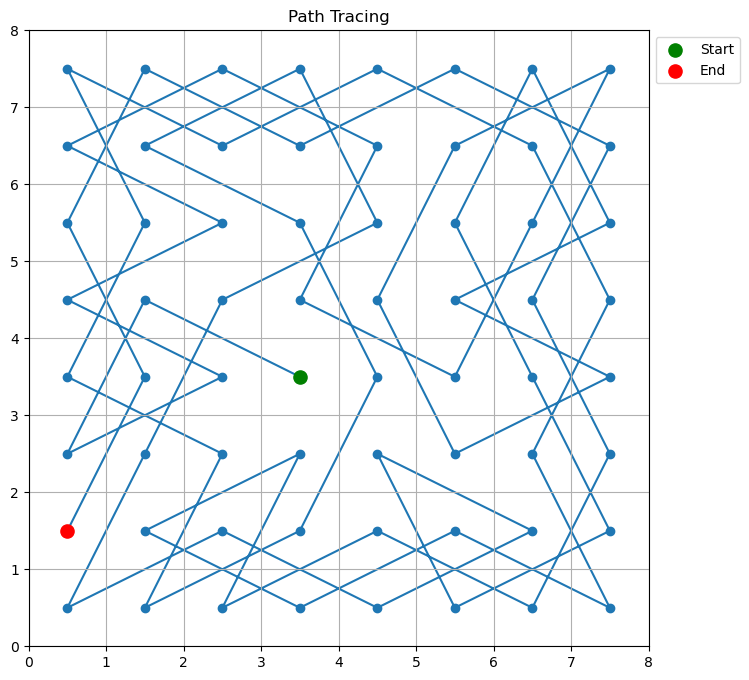

In [31]:
# Adjusting the given path to use the midpoint of the matrix as the reference for plotting points
mid_point = np.array([.5, .5])
adjusted_path = sample1.path + mid_point

plt.figure(figsize=(8, 8))
plt.xlim(0, board_size)
plt.ylim(0, board_size)

plt.plot(adjusted_path[:, 1], adjusted_path[:, 0], marker='o', zorder = -1)
plt.scatter(adjusted_path[0][1], adjusted_path[0][0], marker='o', color='green', label='Start', s= 90)
plt.scatter(adjusted_path[-1][1], adjusted_path[-1][0], marker='o', color='red', label='End', s= 90)

plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Path Tracing')

plt.show()

(array([0., 0., 0., 0., 0., 8., 0., 0., 0., 0.]),
 array([36656508.5, 36656508.6, 36656508.7, 36656508.8, 36656508.9,
        36656509. , 36656509.1, 36656509.2, 36656509.3, 36656509.4,
        36656509.5]),
 <BarContainer object of 10 artists>)

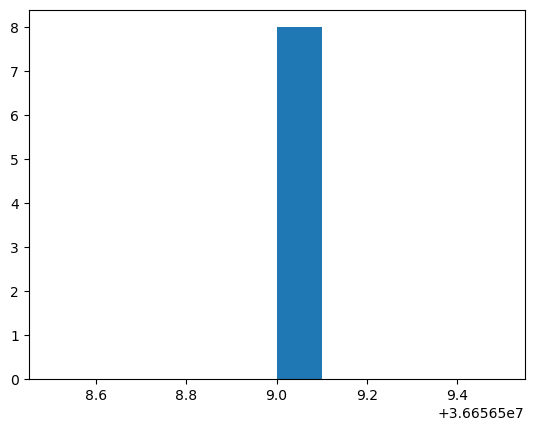

In [32]:
plt.hist(length_dist)

In [34]:
len(length_dist)

8